In [1]:
# only adjust settings in this cell
state = 'NC'
root_name = 'Mecklenburg'# which county will root our district (or county_cluster==multi-district)?
k = 14                   # the state has this number of districts
deviation = 1            # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 3                 # size=1 for single district, size=2 for double district, ...
time_limit = 48*3600     # time limit in seconds

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size
G._time_limit = time_limit

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 14 districts
We seek a multi-district (county cluster) of size = 3


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 745670
Single district upper population limit U = 745671


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Mecklenburg County to be the root. In our graph, this is vertex # 32


In [6]:
import simple_enumerator
districts = simple_enumerator.simple_enumerator(G)

Sol# Node# Time(s) district
1 25558 0.28 [32, 28, 20, 74, 62, 15, 63, 81, 99, 72]
2 4027520 53.12 [32, 28, 20, 99, 72, 88, 11, 83, 73, 3, 41, 1, 69, 98, 22, 42]
3 4537318 59.74 [32, 28, 20, 99, 72, 10, 61, 73, 13, 83, 11, 57, 12, 50]
4 6274300 85.16 [32, 28, 20, 99, 72, 10, 50, 67, 57, 11, 83, 36]
5 12391087 170.85 [32, 28, 7, 15, 35, 62, 99, 72, 88, 11, 12]
6 18354845 250.67 [32, 28, 7, 70, 81, 99, 72, 88, 11, 83, 73, 3, 94]
7 29880068 410.88 [32, 28, 7, 62, 23, 34, 81, 50, 88, 11, 83, 3, 94, 99, 24, 41]
8 33871865 464.84 [32, 28, 7, 80, 63, 35, 23, 38, 34, 50, 88, 11, 83]
9 63666464 910.87 [32, 28, 7, 23, 50, 72, 10, 61, 13, 83, 3, 94, 1, 69, 99, 45, 24, 92]
10 64633464 925.51 [32, 28, 7, 23, 99, 72, 10, 61, 13, 83, 3, 41, 1, 69, 98, 22, 82, 31]
11 64845373 928.32 [32, 28, 7, 37, 59, 81, 50, 88, 11, 83, 73, 3, 13]
12 68511697 988.33 [32, 28, 7, 37, 99, 72, 88, 12, 10, 61, 13, 83, 36, 3, 24]
13 69308283 1001.4 [32, 28, 7, 37, 99, 72, 10, 61, 56, 13, 83, 11, 57, 12, 50]
14 86881095 127

91 982180490 21626.43 [32, 28, 99, 72, 88, 11, 83, 3, 94, 26, 69, 10, 45, 82, 24, 22, 98, 41, 16, 79]
92 983891963 21649.59 [32, 28, 99, 72, 88, 11, 83, 3, 94, 26, 13, 50, 45, 82, 24, 22, 42, 18, 79, 98, 41]
93 1063814812 22897.92 [32, 28, 99, 72, 88, 12, 73, 61, 56, 10, 13, 83, 3, 94, 1, 69, 98, 41, 16, 79]
94 1072134762 23026.09 [32, 28, 99, 72, 88, 12, 10, 61, 56, 13, 83, 36, 2, 31, 82, 50, 22, 42, 98, 16]
95 1076256915 23090.67 [32, 28, 99, 72, 88, 12, 10, 61, 13, 83, 3, 94, 26, 69, 50, 45, 24, 22, 98]
96 1097711742 23430.31 [32, 28, 99, 72, 88, 73, 61, 10, 13, 83, 3, 94, 1, 69, 45, 82, 47, 92]
97 1147417059 24223.87 [32, 28, 99, 72, 88, 10, 61, 13, 83, 3, 94, 1, 69, 45, 31, 2, 82, 22, 42]
98 1186858976 24854.43 [32, 28, 99, 72, 10, 61, 73, 56, 13, 83, 21, 2, 31, 50, 45, 24, 94, 41]
99 1186874086 24854.62 [32, 28, 99, 72, 10, 61, 73, 56, 13, 83, 21, 3, 94, 1, 69, 98]
100 1186922945 24855.25 [32, 28, 99, 72, 10, 61, 73, 56, 13, 83, 11, 57, 12, 3, 94, 24, 2]
101 1190270289 24903.89 [

In [7]:
import math

def objective(DG, district, obj_type):
    district_bool = { i : False for i in DG.nodes }
    for i in district:
        district_bool[i] = True
    if obj_type == 'cut_edges':
        return sum( 1 for u in district for v in DG.neighbors(u) if not district_bool[v] )
    elif obj_type == 'perimeter':
        internal_perim = sum( DG.edges[u,v]['shared_perim'] for u in district for v in DG.neighbors(u) if not district_bool[v] )
        external_perim = sum( DG.nodes[i]['boundary_perim'] for i in district if DG.nodes[i]['boundary_node'] ) 
        return internal_perim + external_perim
    elif obj_type =='inverse_polsby_popper':
        internal_perim = sum( DG.edges[u,v]['shared_perim'] for u in district for v in DG.neighbors(u) if not district_bool[v] )
        external_perim = sum( DG.nodes[i]['boundary_perim'] for i in district if DG.nodes[i]['boundary_node'] ) 
        P = internal_perim + external_perim
        A = sum( DG.nodes[i]['area'] for i in district )
        return P * P / ( 4 * math.pi * A )
    else:
        assert False

In [8]:
# Draw the districting plans.
filename = state + '_county.shp'
from cluster import draw_single_district

For objective type cut_edges here are the identified maps within 10% of the incumbent objective = 21


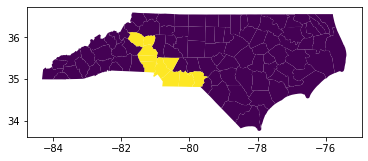

In [9]:
obj_type = 'cut_edges'
min_obj = min( objective(G, districts[p], obj_type) for p in range(len(districts)) )
print("For objective type",obj_type,"here are the identified maps within 10% of the incumbent objective =",min_obj)
for p in range(len(districts)):
    if objective(G, districts[p], obj_type) <= 1.10 * min_obj:
        draw_single_district( filepath, filename, G, districts[p], zoom=False )

For objective type perimeter here are the identified maps within 10% of the incumbent objective = 8.34487996694967


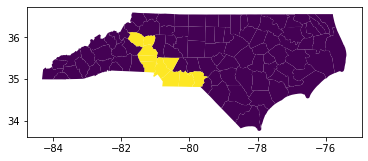

In [10]:
obj_type = 'perimeter'
min_obj = min( objective(G, districts[p], obj_type) for p in range(len(districts)) )
print("For objective type",obj_type,"here are the identified maps within 10% of the incumbent objective =",min_obj)
for p in range(len(districts)):
    if objective(G, districts[p], obj_type) <= 1.10 * min_obj:
        draw_single_district( filepath, filename, G, districts[p], zoom=False )

For objective type inverse_polsby_popper here are the identified maps within 10% of the incumbent objective = 4.916513483673791


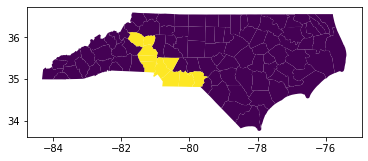

In [11]:
obj_type = 'inverse_polsby_popper'
min_obj = min( objective(G, districts[p], obj_type) for p in range(len(districts)) )
print("For objective type",obj_type,"here are the identified maps within 10% of the incumbent objective =",min_obj)
for p in range(len(districts)):
    if objective(G, districts[p], obj_type) <= 1.10 * min_obj:
        draw_single_district( filepath, filename, G, districts[p], zoom=False )